# Water Filling in Communications
by Robert Gowers, Roger Hill, Sami Al-Izzi, Timothy Pollington and Keith Briggs

from Boyd and Vandenberghe, Convex Optimization, example 5.2 page 145

Convex optimisation can be used to solve the classic water filling problem.  This problem is where a total amount of power $P$ has to be assigned to $n$ communication channels, with the objective of maximising the total communication rate.  The communication rate of the $i$th channel is given by:

$\log(\alpha_i + x_i)$

where $x_i$ represents the power allocated to channel $i$ and $\alpha_i$ represents the floor above the baseline at which power can be added to the channel.  Since $-\log(X)$ is convex, we can write the water-filling problem as a convex optimisation problem:

minimise $\sum_{i=1}^N -\log(\alpha_i + x_i)$ 

subject to $x_i \succeq 0$ and $\sum_{i=1}^N x_i = P$

This form is also very straightforward to put into DCP format and thus can be simply solved using CVXPY.

In [1]:
#!/usr/bin/env python3
# @author: R. Gowers, S. Al-Izzi, T. Pollington, R. Hill & K. Briggs
import numpy as np
import cvxpy as cp

In [2]:
def water_filling(n, a, sum_x=1):
    '''
    Boyd and Vandenberghe, Convex Optimization, example 5.2 page 145
    Water-filling.
  
    This problem arises in information theory, in allocating power to a set of
    n communication channels in order to maximise the total channel capacity.
    The variable x_i represents the transmitter power allocated to the ith channel, 
    and log(α_i+x_i) gives the capacity or maximum communication rate of the channel. 
    The objective is to minimise -∑log(α_i+x_i) subject to the constraint ∑x_i = 1 
    '''
    
    # Declare variables and parameters
    x = cp.Variable(shape=n)
    alpha = cp.Parameter(n, nonneg=True)
    alpha.value = a

    # Choose objective function. Interpret as maximising the total communication rate of all the channels
    obj = cp.Maximize(cp.sum(cp.log(alpha + x)))

    # Declare constraints
    constraints = [x >= 0, cp.sum(x) - sum_x == 0]
      
    # Solve
    prob = cp.Problem(obj, constraints)
    prob.solve()
    if(prob.status=='optimal'):
        return prob.status, prob.value, x.value
    else:
        return prob.status, np.nan, np.nan

## Example
As a simple example, we set $N = 3$, $P = 1$ and $\boldsymbol{\alpha} = (0.8,1.0,1.2)$.

The function outputs whether the problem status, the maximum communication rate and the power allocation required is achieved with this maximum communication rate.

In [3]:
# As an example, we will solve the water filling problem with 3 buckets, each with different α
np.set_printoptions(precision=3) 
buckets = 3
alpha = np.array([0.8, 1.0, 1.2])

In [4]:
stat, prob, x = water_filling(buckets, alpha)
print('Problem status: {}'.format(stat))
print('Optimal communication rate = {:.4g} '.format(prob))
print('Transmitter powers:\n{}'.format(x))

Problem status: optimal
Optimal communication rate = 0.863 
Transmitter powers:
[0.533 0.333 0.133]


To illustrate the water filling principle, we will plot $\alpha_i + x_i$ and check that this level is flat where power has been allocated:

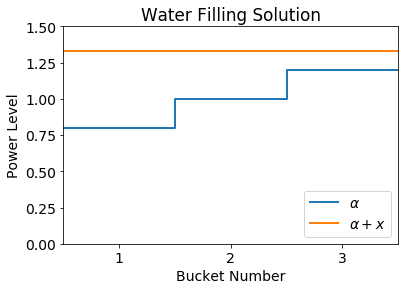

In [5]:
import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

matplotlib.rcParams.update({'font.size': 14})

axis = np.arange(0.5,buckets+1.5,1)
index = axis+0.5
X = x.copy()
Y = alpha + X

# to include the last data point as a step, we need to repeat it
A = np.concatenate((alpha,[alpha[-1]]))
X = np.concatenate((X,[X[-1]]))
Y = np.concatenate((Y,[Y[-1]]))

plt.xticks(index)
plt.xlim(0.5,buckets+0.5)
plt.ylim(0,1.5)
plt.step(axis,A,where='post',label =r'$\alpha$',lw=2)
plt.step(axis,Y,where='post',label=r'$\alpha + x$',lw=2)
plt.legend(loc='lower right')
plt.xlabel('Bucket Number')
plt.ylabel('Power Level')
plt.title('Water Filling Solution')
plt.show()